# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 1
sets = 1

# Create DataFrame
city_data_df1 = pd.DataFrame({"City": cities})

city_data_df1["Country"] = ""
city_data_df1["Date"] = ""      
city_data_df1["Latitude"] = ""
city_data_df1["Longitude"] = ""
city_data_df1["Cloudiness (%)"] = ""
city_data_df1["Humidity (%)"] = ""
city_data_df1["Max Temp (F)"] = ""
city_data_df1["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in city_data_df1.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        city_data_df1.loc[index, "Country"] = weather_response["sys"]["country"]     
        city_data_df1.loc[index, "Date"] = datetime.date.fromtimestamp(weather_response["dt"])
        city_data_df1.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        city_data_df1.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        city_data_df1.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        city_data_df1.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        city_data_df1.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        city_data_df1.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except KeyError:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1  of Set 1 | bubaque.
Processing Record 2  of Set 1 | port-aux-francais.
Processing Record 3  of Set 1 | antalaha.
Processing Record 4  of Set 1 | howard springs.
Processing Record 5  of Set 1 | saint-pierre.
Processing Record 6  of Set 1 | waitangi.
Processing Record 7  of Set 1 | adamstown.
Processing Record 8  of Set 1 | whitehorse.
Processing Record 9  of Set 1 | hamilton.
Processing Record 10  of Set 1 | albany.
Processing Record 11  of Set 1 | weno.
Processing Record 12  of Set 1 | saldanha.
Processing Record 13  of Set 1 | margaret river.
Processing Record 14  of Set 1 | crane.
Processing Record 15  of Set 1 | olbia.
Processing Record 16  of Set 1 | sao gabriel da cachoeira.
Processing Record 17  of Set 1 | bredasdorp.
Processing Record 18  of Set 1 | waiuku.
Processing Record 19  of Set 1 | salinopolis.
Processing Record 20  of Set 1 | bilibino.
Processing Record 21  of Set 1 | grytviken.
Processing Recor

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df1

# Show Record Count
city_data_df.count()

City                601
Country             601
Date                601
Latitude            601
Longitude           601
Cloudiness (%)      601
Humidity (%)        601
Max Temp (F)        601
Wind Speed (mph)    601
dtype: int64

In [15]:
# Display sample data
city_data_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,bubaque,GW,2024-05-09,11.2833,-15.8333,100,81,79.934,3.31
1,port-aux-francais,TF,2024-05-09,-49.35,70.2167,100,91,44.33,16.89
2,antalaha,MG,2024-05-09,-14.9003,50.2788,79,88,73.58,3.29
3,howard springs,AU,2024-05-09,-12.497,131.047,5,66,92.084,4.7
4,saint-pierre,RE,2024-05-09,-21.3393,55.4781,75,83,73.346,7.72
...,...,...,...,...,...,...,...,...,...
596,albunol,ES,2024-05-09,36.792,-3.205,92,66,57.794,0.88
597,santa elena de uairen,VE,2024-05-09,4.6167,-61.1333,100,91,70.592,1.36
598,cumanayagua,CU,2024-05-09,22.1494,-80.2022,33,77,80.618,1.59
599,tadjourah,DJ,2024-05-09,12,42.5,10,57,82.94,2.74


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,bubaque,GW,2024-05-09,11.2833,-15.8333,100.0,81.0,79.934,3.31
1,port-aux-francais,TF,2024-05-09,-49.3500,70.2167,100.0,91.0,44.330,16.89
2,antalaha,MG,2024-05-09,-14.9003,50.2788,79.0,88.0,73.580,3.29
3,howard springs,AU,2024-05-09,-12.4970,131.0470,5.0,66.0,92.084,4.70
4,saint-pierre,RE,2024-05-09,-21.3393,55.4781,75.0,83.0,73.346,7.72


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

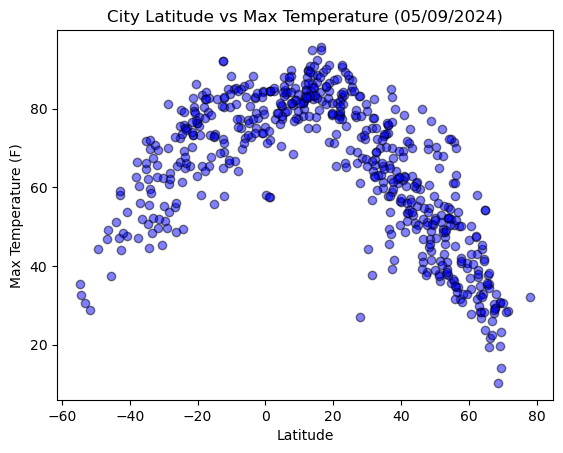

In [18]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

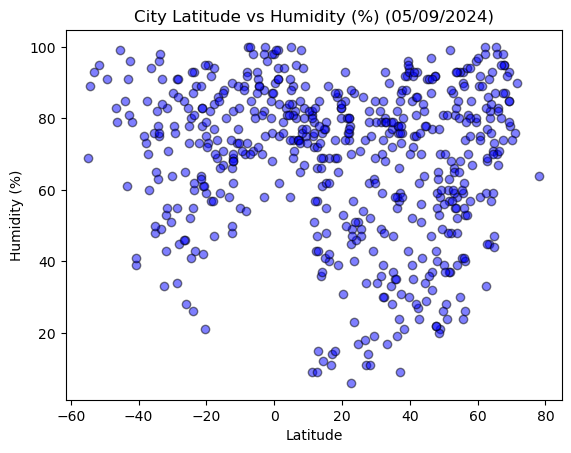

In [19]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

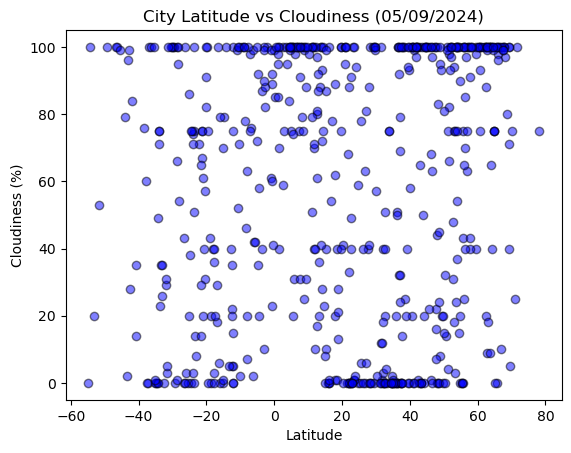

In [20]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

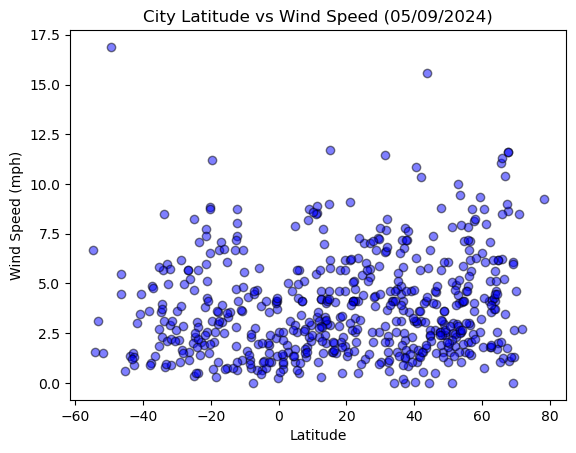

In [21]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Latitude"]).astype(float), pd.to_numeric(city_data_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,bubaque,GW,2024-05-09,11.2833,-15.8333,100.0,81.0,79.934,3.31
7,whitehorse,CA,2024-05-09,60.7161,-135.0538,75.0,58.0,50.072,8.75
8,hamilton,US,2024-05-09,39.1834,-84.5333,40.0,92.0,61.016,4.63
9,albany,US,2024-05-09,42.6001,-73.9662,100.0,62.0,57.020,1.56
10,weno,FM,2024-05-09,7.4515,151.8468,75.0,74.0,89.816,5.14


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) < 0, :]


# Display sample data
southern_hemi_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
1,port-aux-francais,TF,2024-05-09,-49.3500,70.2167,100.0,91.0,44.330,16.89
2,antalaha,MG,2024-05-09,-14.9003,50.2788,79.0,88.0,73.580,3.29
3,howard springs,AU,2024-05-09,-12.4970,131.0470,5.0,66.0,92.084,4.70
4,saint-pierre,RE,2024-05-09,-21.3393,55.4781,75.0,83.0,73.346,7.72
5,waitangi,NZ,2024-05-09,-43.9535,-176.5597,79.0,85.0,51.098,1.34


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.84x + 93.12
The r-squared is: -0.8503340924471704
The regression displays a negative correlation.


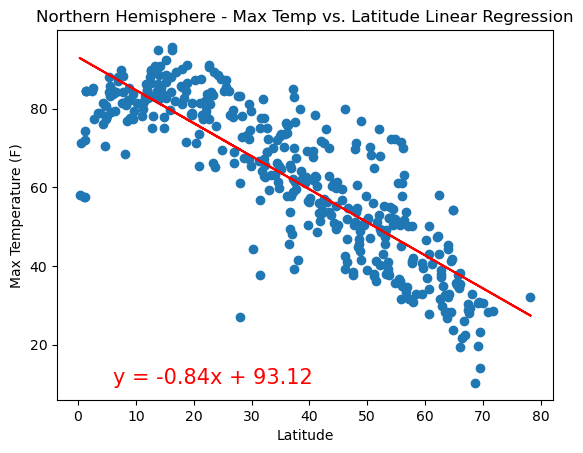

In [25]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

Regression line equation is: y = 0.78x + 85.32
The r-squared is: 0.7731721779375048
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


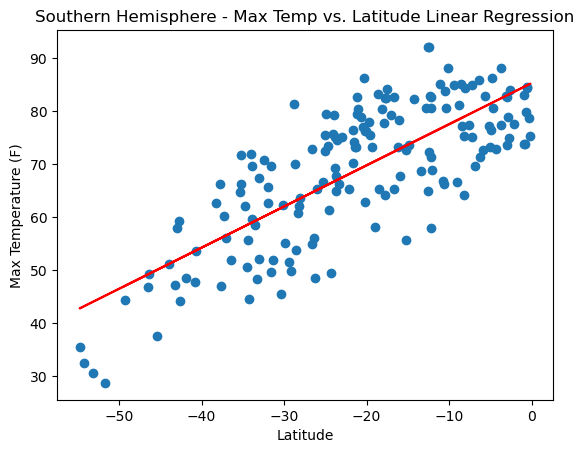

In [26]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

**Discussion about the linear relationship:** As you get farther away from the equator in the northren hemisphere the colder it gets and the closer you get to the equator from the southern hemisphere the warmer it gets.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.03x + 65.01
The r-squared is: 0.02758550560304285


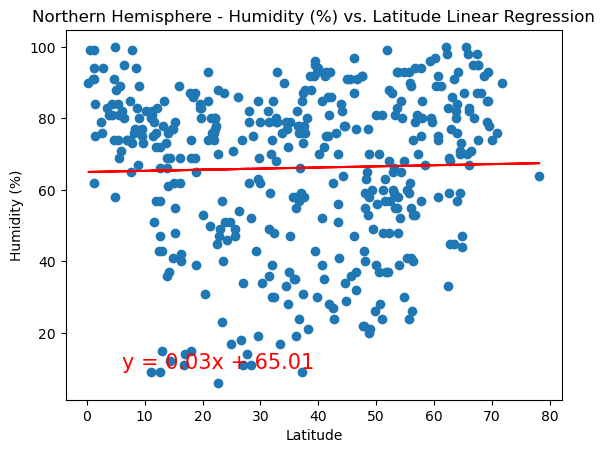

In [27]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

Regression line equation is: y = 0.19x + 77.88
The r-squared is: 0.1421049631869758


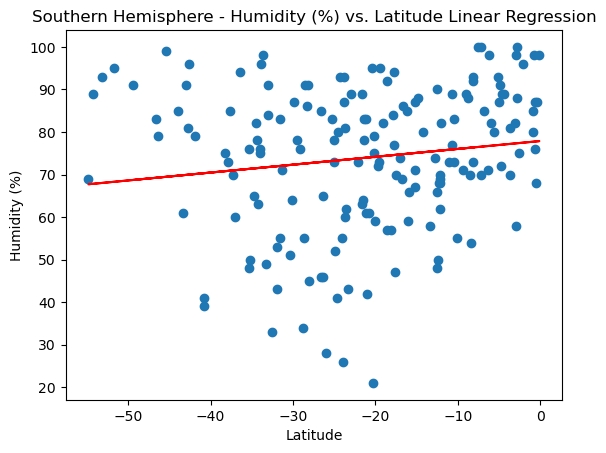

In [29]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is no correlation with the location of the city and the humidity %

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.1x + 55.74
The r-squared is: 0.0507922160829151


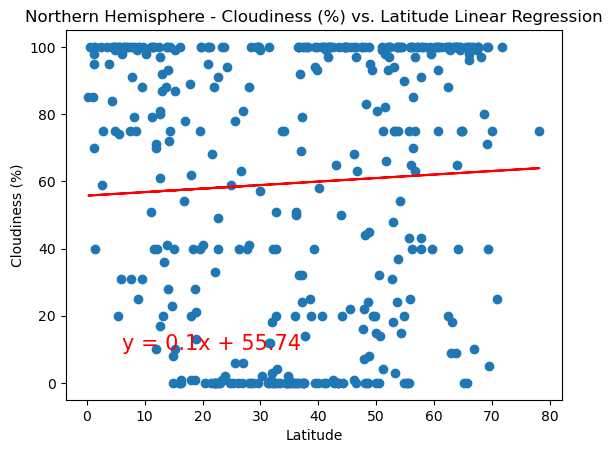

In [30]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

Regression line equation is: y = 0.26x + 57.67
The r-squared is: 0.08960311008252703


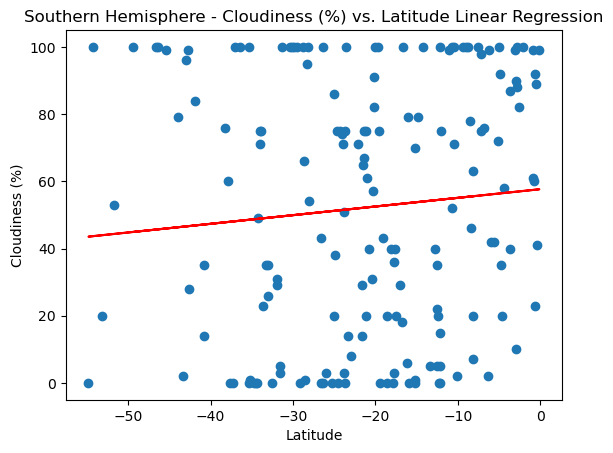

In [31]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is no correlation with the cloudiness % based on latitude

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.02x + 3.22
The r-squared is: 0.15704115355373166


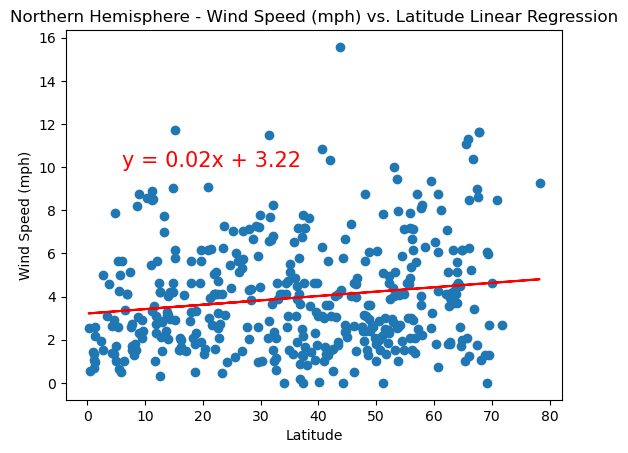

In [32]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

Regression line equation is: y = -0.02x + 2.98
The r-squared is: -0.10027414471855361


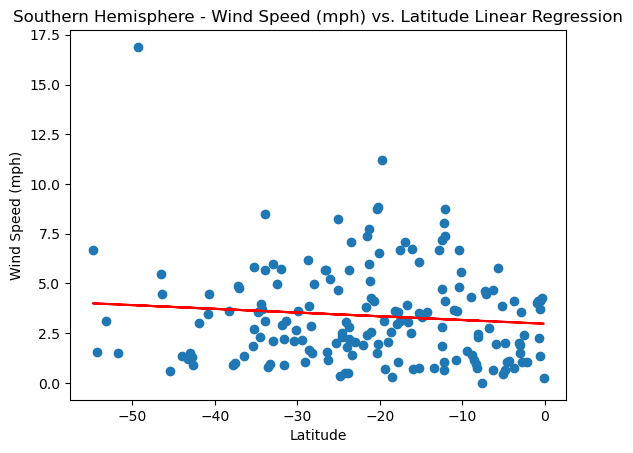

In [33]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The regression does not display much of a correlation between the data sets.